In [133]:
import pandas as pd
df = pd.read_csv('wdbc.data', sep=',', header = None) # Đọc file wine.csv

In [134]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [135]:
import random

def shuffleData(features, labels):
    combined = list(zip(features, labels))
    random.shuffle(combined)
    featureShuffled, labelsShuffled = zip(*combined)
    
    return list(featureShuffled), list(labelsShuffled)

In [136]:
def getSubsets(features, labels, size = 0.4):
    featureShuffled, labelsShuffled = shuffleData(features, labels)
    
    featureLen = int(len(features) * size)
    
    featureTrain = featureShuffled[:featureLen]
    labelTrain = labelsShuffled[:featureLen]
    featureTest = featureShuffled[featureLen:]
    labelTest = labelsShuffled[featureLen:]
    
    return featureTrain, featureTest, labelTrain, labelTest


In [137]:
feature = df.iloc[:, 2:32].values
label = df.iloc[:, 1].values

In [138]:
import matplotlib.pyplot as plt # type: ignore

In [139]:
def drawScatterCharts(origin, train, test):
    labels1 = ['M', 'B']
    labels2 = ['Train', 'Test']
    
    numM1 = sum(1 for cur in origin if cur == 'M')
    numM2 = sum(1 for cur in train if cur == 'M')
    numM3 = sum(1 for cur in test if cur == 'M')
    
    s1 = round(numM1 / len(origin) * 100, 3)
    s2 = round(numM2 / len(train) * 100, 3)
    s3 = round(numM3 / len(test) * 100, 3)
    s4 = round(len(train) / (len(train) + len(test)) * 100, 3)
    
    sizeS1 = [s1, 100 - s1]
    sizeS2 = [s2, 100 - s2]
    sizeS3 = [s3, 100 - s3]
    sizeS4 = [s4, 100 - s4]

    _, chart = plt.subplots(1, 4, figsize=(12, 4))

    wedges1, _, _ = chart[0].pie(sizeS1, labels=labels1, autopct='%1.3f%%', startangle=140, colors = ['#FF7F0E', '#1F77B4'])
    chart[0].axis('equal')
    chart[0].set_title('Original dataset', pad=5, loc='center')
    
    wedges1, _, _ = chart[1].pie(sizeS2, labels=labels1, autopct='%1.3f%%', startangle=140, colors = ['#FF7F0E', '#1F77B4'])
    chart[1].axis('equal')
    chart[1].set_title('Train dataset', pad=5, loc='center')
    
    wedges1, _, _ = chart[2].pie(sizeS3, labels=labels1, autopct='%1.3f%%', startangle=140, colors = ['#FF7F0E', '#1F77B4'])
    chart[2].axis('equal')
    chart[2].set_title('Test dataset', pad=5, loc='center')
    
    wedges2, _, _ = chart[3].pie(sizeS4, labels=labels2, autopct='%1.3f%%', startangle=140, colors = ['#B9CB09', '#1EB630'])
    chart[3].axis('equal')
    chart[3].set_title('Train vs Test in Original set', pad=5, loc='center')
    
    wedges1 += wedges2
    labels1 = ['Malignant', 'Benign']
    labels1 += labels2

    plt.legend(wedges1, labels1, title="Annotation", loc="center left", bbox_to_anchor=(1.2, 0.5))
    plt.subplots_adjust(top=0.85, bottom=0.2)
    plt.show()

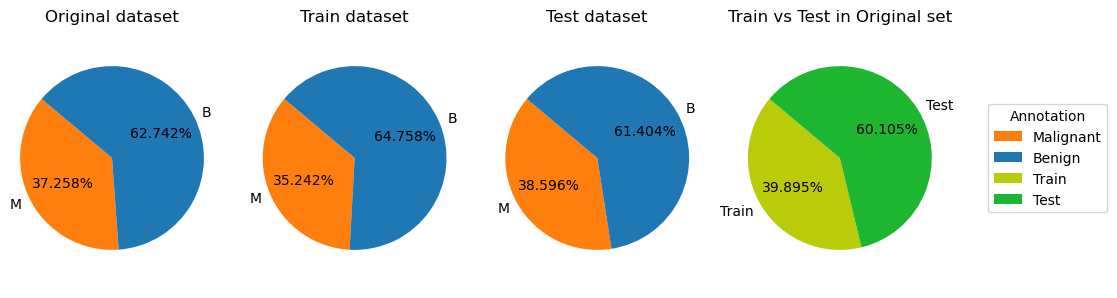

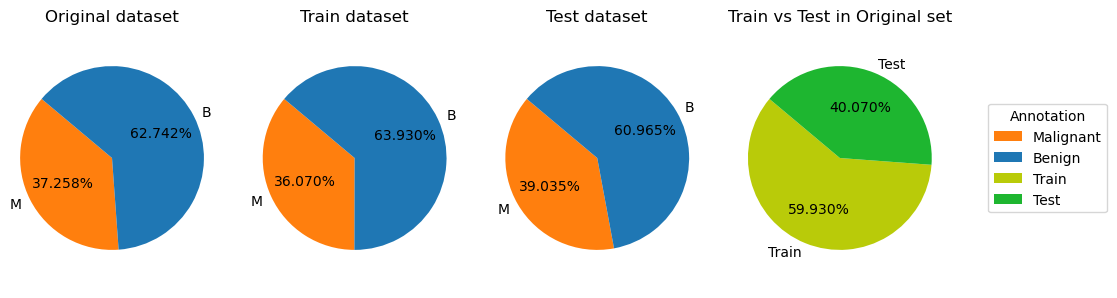

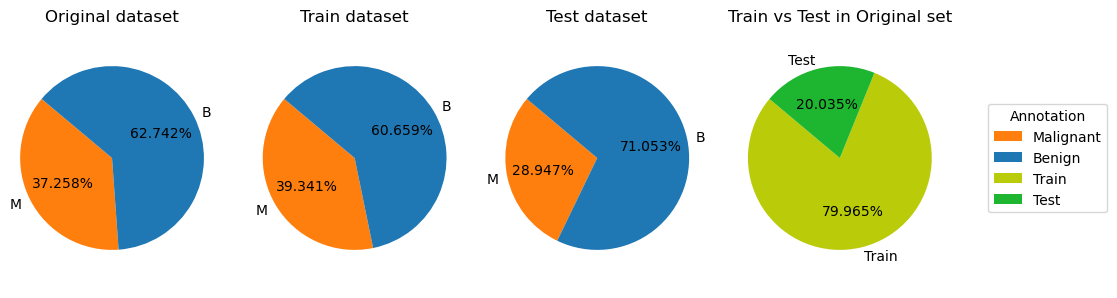

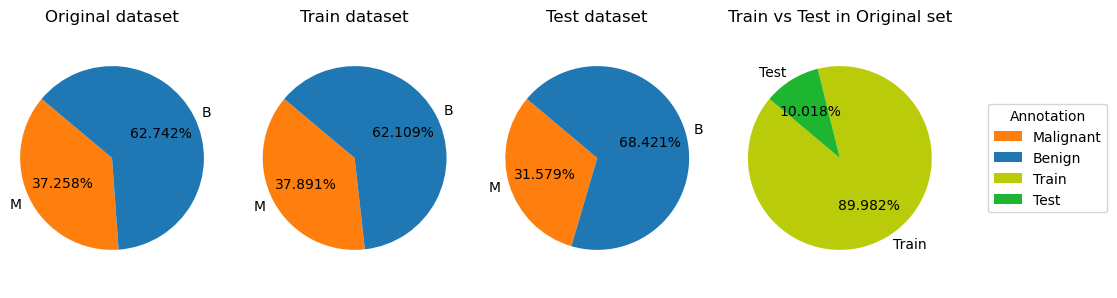

In [140]:
f1Train, f1Test, l1Train, l1Test = getSubsets(feature, label, 0.4)
drawScatterCharts(df[1].tolist(), l1Train, l1Test)
f2Train, f2Test, l2Train, l2Test = getSubsets(feature, label, 0.6)
drawScatterCharts(df[1].tolist(), l2Train, l2Test)
f3Train, f3Test, l3Train, l3Test = getSubsets(feature, label, 0.8)
drawScatterCharts(df[1].tolist(), l3Train, l3Test)
f4Train, f4Test, l4Train, l4Test = getSubsets(feature, label, 0.9)
drawScatterCharts(df[1].tolist(), l4Train, l4Test)

In [141]:
from sklearn.tree import *
import graphviz

[Text(0.5666666666666667, 0.9, 'x[7] <= 0.05\nentropy = 0.936\nsamples = 227\nvalue = [147, 80]'),
 Text(0.26666666666666666, 0.7, 'x[13] <= 34.01\nentropy = 0.306\nsamples = 146\nvalue = [138, 8]'),
 Text(0.13333333333333333, 0.5, 'x[23] <= 960.65\nentropy = 0.063\nsamples = 135\nvalue = [134, 1]'),
 Text(0.06666666666666667, 0.3, 'entropy = 0.0\nsamples = 133\nvalue = [133, 0]'),
 Text(0.2, 0.3, 'x[24] <= 0.121\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.13333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.5, 'x[7] <= 0.029\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4666666666666667, 0.3, 'x[8] <= 0.137\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5333333333333333, 0.1, 'entropy = 0.0\nsamples = 7\nv

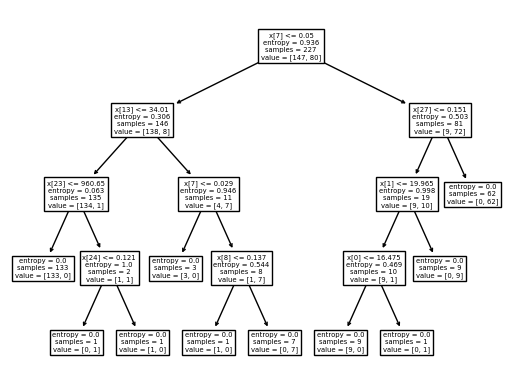

In [142]:
clf1 = DecisionTreeClassifier(criterion='entropy')
clf1 = clf1.fit(f1Train, l1Train)

plot_tree(clf1)

[Text(0.6666666666666666, 0.9166666666666666, 'x[20] <= 16.795\nentropy = 0.943\nsamples = 341\nvalue = [218, 123]'),
 Text(0.42857142857142855, 0.75, 'x[27] <= 0.136\nentropy = 0.392\nsamples = 233\nvalue = [215, 18]'),
 Text(0.23809523809523808, 0.5833333333333334, 'x[13] <= 38.35\nentropy = 0.11\nsamples = 205\nvalue = [202, 3]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[19] <= 0.001\nentropy = 0.046\nsamples = 195\nvalue = [194, 1]'),
 Text(0.09523809523809523, 0.25, 'x[27] <= 0.098\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.047619047619047616, 0.08333333333333333, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.14285714285714285, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.25, 'entropy = 0.0\nsamples = 189\nvalue = [189, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[18] <= 0.025\nentropy = 0.722\nsamples = 10\nvalue = [8, 2]'),
 Text(0.2857142857142857, 0.25, 'x[17] <= 0.014\nentropy = 1.0\n

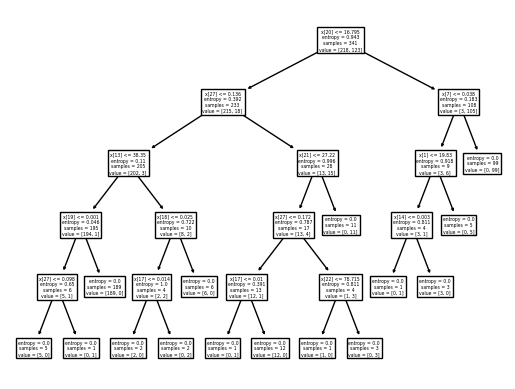

In [143]:
clf2 = DecisionTreeClassifier(criterion='entropy')
clf2 = clf2.fit(f2Train, l2Train)

plot_tree(clf2)

[Text(0.4880952380952381, 0.9166666666666666, 'x[22] <= 106.05\nentropy = 0.967\nsamples = 455\nvalue = [276, 179]'),
 Text(0.23809523809523808, 0.75, 'x[27] <= 0.135\nentropy = 0.265\nsamples = 266\nvalue = [254, 12]'),
 Text(0.14285714285714285, 0.5833333333333334, 'x[10] <= 0.973\nentropy = 0.068\nsamples = 247\nvalue = [245, 2]'),
 Text(0.09523809523809523, 0.4166666666666667, 'x[21] <= 33.35\nentropy = 0.038\nsamples = 246\nvalue = [245, 1]'),
 Text(0.047619047619047616, 0.25, 'entropy = 0.0\nsamples = 228\nvalue = [228, 0]'),
 Text(0.14285714285714285, 0.25, 'x[21] <= 33.56\nentropy = 0.31\nsamples = 18\nvalue = [17, 1]'),
 Text(0.09523809523809523, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.08333333333333333, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.19047619047619047, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[21] <= 25.94\nentropy = 0.99

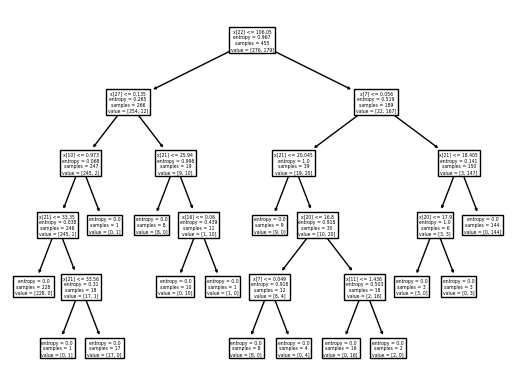

In [144]:
clf3 = DecisionTreeClassifier(criterion='entropy')
clf3 = clf3.fit(f3Train, l3Train)

plot_tree(clf3)

[Text(0.6704545454545454, 0.9375, 'x[22] <= 114.45\nentropy = 0.957\nsamples = 512\nvalue = [318, 194]'),
 Text(0.4318181818181818, 0.8125, 'x[27] <= 0.111\nentropy = 0.494\nsamples = 352\nvalue = [314, 38]'),
 Text(0.22727272727272727, 0.6875, 'x[10] <= 0.566\nentropy = 0.11\nsamples = 274\nvalue = [270, 4]'),
 Text(0.09090909090909091, 0.5625, 'x[21] <= 33.27\nentropy = 0.035\nsamples = 268\nvalue = [267, 1]'),
 Text(0.045454545454545456, 0.4375, 'entropy = 0.0\nsamples = 253\nvalue = [253, 0]'),
 Text(0.13636363636363635, 0.4375, 'x[21] <= 33.56\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]'),
 Text(0.09090909090909091, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18181818181818182, 0.3125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.36363636363636365, 0.5625, 'x[1] <= 21.645\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.3181818181818182, 0.4375, 'x[28] <= 0.208\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2727272727272727, 0.312

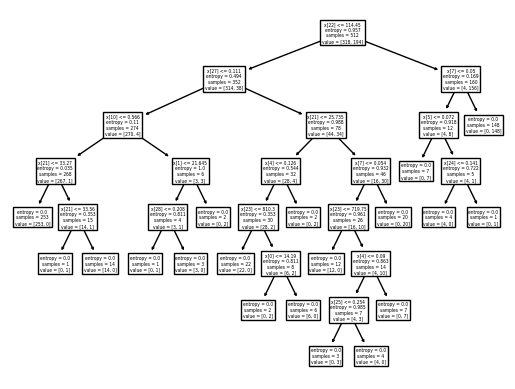

In [145]:
clf4 = DecisionTreeClassifier(criterion='entropy')
clf4 = clf4.fit(f4Train, l4Train)

plot_tree(clf4)

In [146]:
predict1 = clf1.predict(f1Test)
from sklearn.metrics import *

print(classification_report(l1Test, predict1, target_names=['Malignant', 'Benign']))

              precision    recall  f1-score   support

   Malignant       0.95      0.95      0.95       210
      Benign       0.92      0.92      0.92       132

    accuracy                           0.94       342
   macro avg       0.94      0.93      0.94       342
weighted avg       0.94      0.94      0.94       342



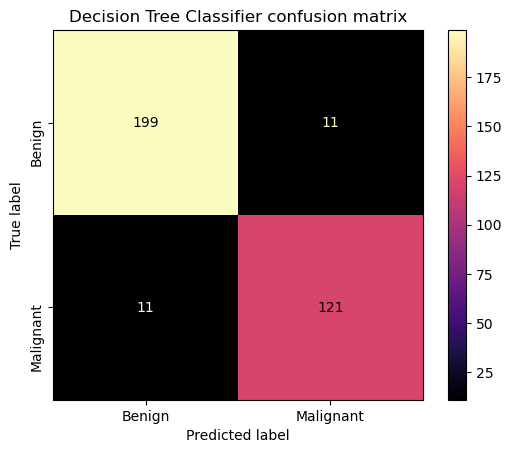

In [147]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(l1Test, predict1)
cmap = plt.cm.magma

disp = ConfusionMatrixDisplay.from_estimator(clf1.fit(f1Train, l1Train), f1Test, l1Test, display_labels=['Benign', 'Malignant'], cmap=cmap)
plt.title("Decision Tree Classifier confusion matrix")
plt.yticks(rotation=90)
plt.show()

342 228 114 57 227 341 455 512


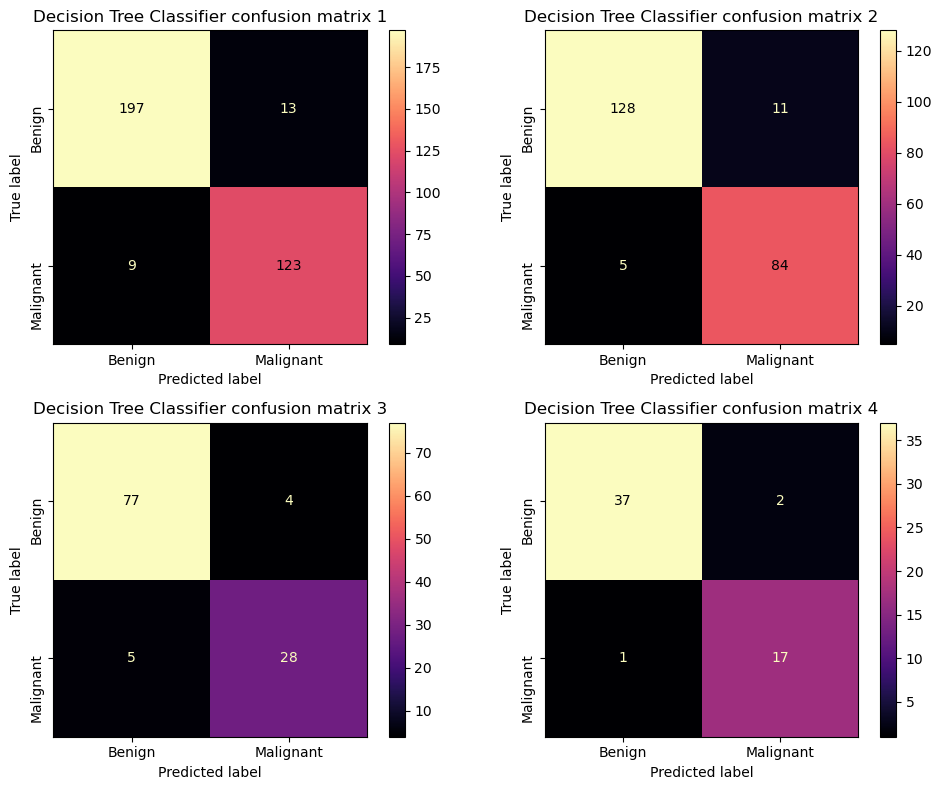

In [151]:
clfDict = {
    0 : clf1.fit(f1Train, l1Train),
    1 : clf2.fit(f2Train, l2Train),
    2 : clf3.fit(f3Train, l3Train),
    3 : clf4.fit(f4Train, l4Train)  
}

subsetDict = {
    0 : [f1Test, l1Test],
    1 : [f2Test, l2Test],
    2 : [f3Test, l3Test],
    3 : [f4Test, l4Test]
}
print(len(f1Test), len(f2Test), len(f3Test), len(f4Test), len(f1Train), len(f2Train), len(f3Train), len(f4Train))

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axes.flatten()):
    clf = clfDict[i]
    disp = ConfusionMatrixDisplay.from_estimator(clf, subsetDict[i][0], subsetDict[i][1], display_labels=['Benign', 'Malignant'], cmap=plt.cm.magma, ax=ax,  xticks_rotation='horizontal')
    ax.set_title(f"Decision Tree Classifier confusion matrix {i+1}")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')

plt.tight_layout()
plt.yticks(rotation=90)
plt.show()
